In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv("Placement.csv")

In [4]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
# 1. Replace the NaN values with correct value. And justify why you have chosen the same.

dataset["salary"].fillna(0,inplace=True)

In [7]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [8]:
# 2. How many of them are not placed?

counts= dataset['status'].value_counts().get('Not Placed')
print("How many of them are not placed:", counts)

How many of them are not placed: 67


In [9]:
# 3. Find the reason for non placement from the dataset?
# I have checked as my best level but unable to find that much difference

In [10]:
# 4. What kind of relation between salary and mba_p
r_dataset = pd.read_csv("PrePlacement_Quan.csv")
r_dataset.corr()

#import seaborn as sea
#import matplotlib.pyplot as plt
#dataset[['salary','mba_p']].plot(kind='line')

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.051550
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.051550,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


In [11]:
# No Pattern between those two columns

In [44]:
# 5. Which specialisation is getting minimum salary?

sort_sal=sorted(set(dataset['salary']))
if len(sort_sal)>1:
    second_min_sal = sort_sal[1]
second_min_sal

200000.0

In [45]:
# 6. How many of them getting above 500000 salary?

above_sal=[]
for high_sal in dataset['salary']:
    if(high_sal>500000):
        above_sal.append(high_sal)
above_sal
print("How many of them getting above 500000 salary:",above_sal)

How many of them getting above 500000 salary: [940000.0, 690000.0, 650000.0]


In [46]:
# 7. Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)


#Problem statement:
# Its One Way Classification
# H0 - There are no significants between these two data
# H1 - There are significants between these two data

import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [47]:
# As per the requirement if pvalue is < 5% then Reject Null (there is significant values) but this scenario pvalue is 4.67
# So these two data is Reject Null (There is significant values) (Alternate hypothesis)

In [48]:
# 8. Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.
#(Make decision using Hypothesis Testing)

#Problem statement:
# Its Two Way Classification
# H0 - There are no significants between these two data
# H1 - There are significants between these two data

from statsmodels.formula.api import ols
import statsmodels.api as sm

#formula = 'salary ~ C(degree_t["Sci&Tech"]) + C(specialisation["Mkt&HR"]) +  C(degree_t["Sci&Tech"]):C(specialisation["Mkt&HR"])'
def twoway(dataset,degree_t,specialisation):
    formula = 'salary ~ C(degree_t) + C(specialisation) +  C(degree_t):C(specialisation)'
    model = ols(formula, dataset).fit()
    anova = sm.stats.anova_lm(model,type=2)
    return anova

In [49]:
twoway(dataset,'Sci&Tech','Mkt&HR')

,df,sum_sq,mean_sq,F,PR(>F)
C(degree_t),2.0,8.032042e+10,4.016021e+10,1.803516,0.167273
C(specialisation),1.0,3.815378e+11,3.815378e+11,17.134112,0.000051
C(degree_t):C(specialisation),2.0,1.101264e+10,5.506318e+09,0.247278,0.781152
Residual,209.0,4.653956e+12,2.226773e+10,NaN,NaN


In [50]:
# As per the requirement if pvalue is < 5% then Reject Null (there is significant values) but this scenario pvalue is 78%
# So these data is Accept Null (There is no significant values) (null hypothesis)

<Axes: xlabel='salary', ylabel='Density'>

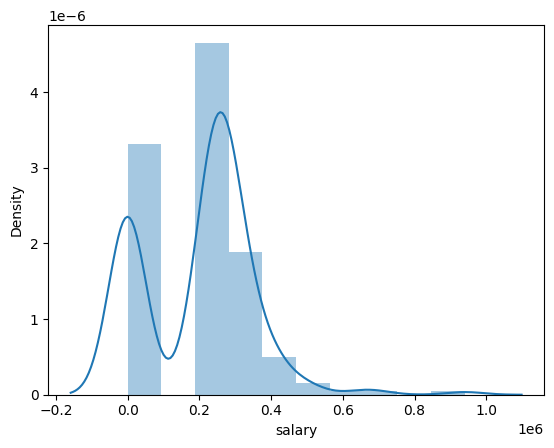

In [51]:
# 9. Convert the normal distribution to standard normal distribution for salary column

#Normal Distribution
import seaborn as sea
sea.distplot(dataset["salary"])

In [52]:
#Standared Normal Distribution
def SND(dataset):
    import seaborn as sea
    mean = dataset.mean()
    std = dataset.std()
    value = [i for i in dataset]
    z_score = [((x-mean)/std) for x in value]
    sea.distplot(z_score,kde=True)

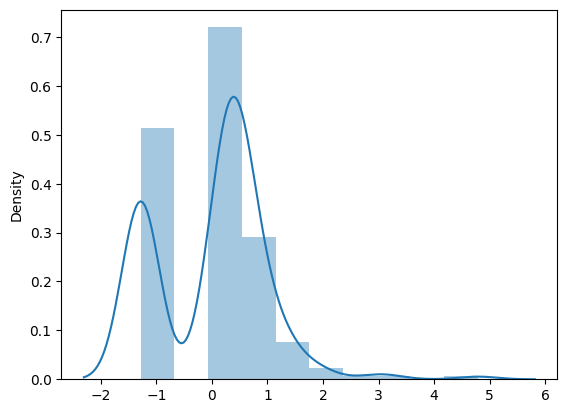

In [53]:
SND(dataset['salary'])

In [54]:
# 10. What is the probability Density Function of the salary range from 700000 to 900000?

def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sea
    ax = sea.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Green')
    pyplot.axvline(endrange,color='Red')
    #generate sample
    sample = dataset
    #calculate parameters
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std)) # %.3f mean is 3.147
    #define the distibution
    dist = norm(sample_mean, sample_std)
    # sample probability for a range of outcomes
    values = np.arange(startrange,endrange,0.1)
    probability = [dist.pdf(value) for value in values]
    prob = sum(probability)
    print("The are between range ({},{}):{}".format(startrange,endrange,sum(probability)))
    return prob
    

Mean=198702.326, Standard Deviation=154780.927
The are between range (700000,800000):0.005490608556823928


0.005490608556823928

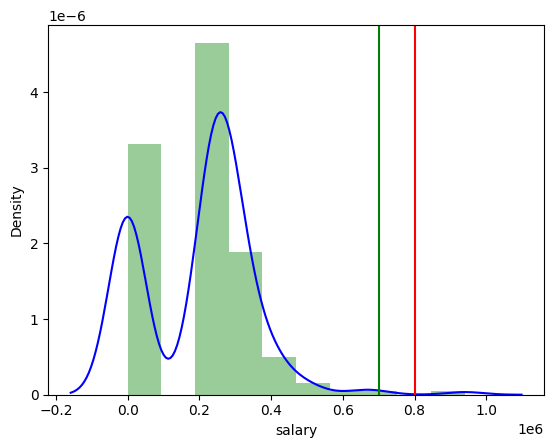

In [55]:
get_pdf_probability(dataset["salary"],700000,800000)

In [56]:
# 11. Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

# Problem Statement
# Its is Paired Test - Dependent Sample
# Same groups (Sci&Tech) but different condition (etest_p & mba_p)

from scipy.stats import ttest_rel
dataset = dataset.dropna()
etest_p = dataset[dataset['degree_t']=="Sci&Tech"]["etest_p"]
mba_p = dataset[dataset['degree_t']=="Sci&Tech"]["mba_p"]
ttest_rel(etest_p,mba_p)

TtestResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06, df=58)

In [57]:
# As per the requirement significant value is 5% between the given dataset but we have 5.5%
# So this is Accept Null hypothesis (the given dataset value has no significant values)

In [58]:
# 12. Which parameter is highly correlated with salary?

dataset=pd.read_csv("PrePlacement_Quan.csv")
dataset = dataset.drop("sl_no",axis=1)
dataset.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


In [59]:
# Which parameter is highly correlated with salary: 0.152829

In [60]:
# 13. Plot any useful graph and explain it.

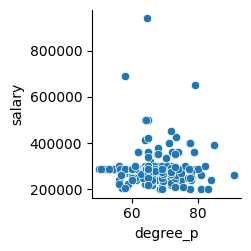

In [74]:
#sea.pairplot(dataset[["salary","ssc_p"]])
g_dataset = pd.read_csv("Placement.csv")
sea.pairplot(dataset,x_vars=['degree_p'],y_vars=['salary'])

In [75]:
# In this graph its showmn as salary for as per their degree pass mark.